# scipy

### Integration


* $\int_0^5 dx (x^2 + 3)$

* We will use Gaussian quadrature  https://en.wikipedia.org/wiki/Gaussian_quadrature 

* exact answer is $5^3 / 3 + 3\times5 $

In [1]:
5.**3 / 3 + 3 * 5.

56.666666666666664

In [3]:
from scipy import integrate

import numpy as np

def myf(x):
    return x**2 + 3

I, err = integrate.quad(myf, 0, 5, epsabs = 1.e-14)

print I, err

56.6666666667 6.29126380621e-13


In [5]:
integrate.quad?


### Integration of a pre-sampled function

In astrophysics this happens a lot -- someone hands you some pre-sampled points, and you have to calculate the area under the curve.

Recall Simpson's rule -- https://en.wikipedia.org/wiki/Gaussian_quadrature


In [7]:
N = 20


x = np.linspace(0, 2 * np.pi, N)
print(x)

[ 0.          0.33069396  0.66138793  0.99208189  1.32277585  1.65346982
  1.98416378  2.31485774  2.64555171  2.97624567  3.30693964  3.6376336
  3.96832756  4.29902153  4.62971549  4.96040945  5.29110342  5.62179738
  5.95249134  6.28318531]


In [8]:
y = np.cos(x)**2

Populating the interactive namespace from numpy and matplotlib


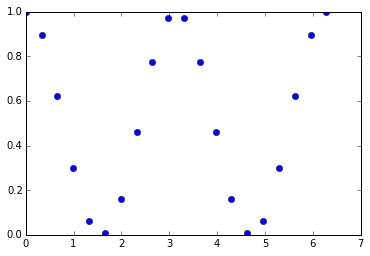

In [9]:
%pylab inline

plot(x, y, 'o')


In [10]:
val = integrate.simps(y,x)

In [11]:
print "value is", val, "fractional error is" , np.abs(val - np.pi) / np.pi

value is 3.13578182353 fractional error is 0.00184964465442


Not bad -- 0.2% accuracy based on so few points.

### Interpolation

* Say you have some data on a coarsely-sampled grid and need data on a finer grid.
* Example function (from which coarse data are drawn):  $f(x) = (e^{-x})  \sin(2  \pi  x)$

In [12]:
def myf(x):
    return (exp(-x)) * sin(2 * numpy.pi * x)

Let's sample this at a handful of points.

In [13]:
x_coarse = linspace(0, 2, num = 8)

In [14]:
x_fine = linspace(0, 2, num = 50)

We will use a cubic spline  http://mathworld.wolfram.com/CubicSpline.html

In [22]:
from scipy import interpolate
myInterpFunc = interpolate.interp1d(x_coarse, myf(x_coarse))

In [23]:
y_coarse = myInterpFunc(x_coarse)

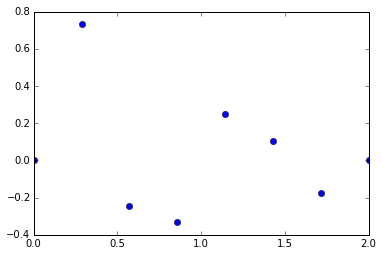

In [24]:
plot(x_coarse, y_coarse, 'o', label = 'original points')

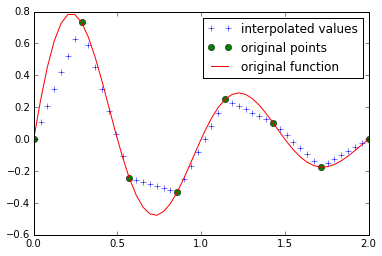

In [25]:
plot(x_fine, myInterpFunc(x_fine), '+', label = 'interpolated values')
plot(x_coarse, myf(x_coarse), 'o', label = 'original points')



plot(x_fine, myf(x_fine), label = 'original function')
legend()